<a href="https://colab.research.google.com/github/Shrutiba/iisc_cds/blob/main/M2_AST_04_Decision_Trees_CART_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 4: Decision Trees and CART Algorithm

## Learning Objectives

At the end of the experiment, you will be able to

* know the concept of decision tree algorithm
* know how to visualize a decision tree and make illustrations from it
* understand the classification and regression tree (CART) algorithm
* know about the basic mathematics behind the predictions and classifications made by decision trees
* know what is hyperparameter regularization

In [ ]:
#@title Walkthrough Video
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.chn.talentsprint.com/content/Decision_Trees_CART.mp4">
</video>""")

### Decision Trees

Decision Trees are supervised Machine Learning algorithms that can perform both classification and regression tasks and even multioutput tasks. They can handle complex datasets. As the name shows, it uses a tree-like model to make decisions in order to classify or predict according to the problem. It is an ML algorithm that progressively divides datasets into smaller data groups based on a descriptive feature until it reaches sets that are small enough to be described by some label.

The importance of decision tree algorithm is that it has many applications in the real world. For example:

1. In the Healthcare sector: To develop Clinical Decision Analysis tools which allow decision-makers to apply for evidence-based medicine and make objective clinical decisions when faced with complex situations.
2. Virtual Assistants (Chatbots): To develop chatbots that provide information and assistance to customers in any required domain.
3. Retail and Marketing: Sentiment analysis detects the pulse of customer feedback and emotions and allows organizations to learn about customer choices and drives decisions.





#### How can an algorithm be represented as a tree?

![Image](https://i.ibb.co/rwBRM7B/decistion-tree.jpg)

$\hspace{8cm} \text {Figure 1: Basic Structure of Decision Tree}$

The **Iris dataset** was collected to quantify the morphologic variation of Iris flowers of three related species.
The **Iris dataset** consists of 50 samples from each of three species of Iris **(Iris setosa, Iris virginica and Iris versicolor)**. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, a linear discriminant model was developed by Fisher to distinguish the species from each other.

For this, let us see the basic example of the [iris dataset](https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html) which predicts whether an iris flower falls under the species Setosa or Versicolour or Virginica. The below tree uses 4 attributes from the dataset, namely Sepal Length, Sepal Width, Petal Length and Petal Width.

For further details, you can refer to the [Iris Dataset description](https://en.wikipedia.org/wiki/Iris_flower_data_set)


![Image](https://cdn.exec.talentsprint.com/static/cds/content/Iris_dataset_decision_tree.png)
$\hspace{8cm} \text {Figure 2: Decision tree using example}$

The decision tree shown in the image classifies samples based on the Gini impurity and splits them using the features petal width (cm), petal length (cm), and sepal length (cm) with specific threshold values.

1. At the root node, the tree splits on petal width (cm) <= 0.8. This results in two branches:

 - **True:** Contains 47 samples with Gini impurity 0.0 and all samples belonging to one class (value = [47, 0, 0]).

 - **False:** Contains 99 samples with Gini impurity 0.5 and values distributed across two classes (value = [0, 49, 50]).

2. The right branch (False) splits further on petal width (cm) <= 1.75:

 - **True:** Contains 53 samples with Gini impurity 0.171 and values [0, 48, 5].

 - **False:** Contains 46 samples with Gini impurity 0.043 and values [0, 1, 45].

3. In the True branch of the second split (petal width (cm) <= 1.75), a further split is made on petal length (cm) <= 4.65:

 - **True:** Contains 39 samples with Gini impurity 0.05 and values [0, 38, 1].

 - **False:** Contains 14 samples with Gini impurity 0.408 and values [0, 10, 4].

4. In the False branch of the second split (petal width (cm) <= 1.75), a further split is made on sepal length (cm) <= 6.25:

 - **True:** Contains 11 samples with Gini impurity 0.165 and values [0, 1, 10].
 - **False:** Contains 35 samples with Gini impurity 0.0 and values [0, 0, 35].

This decision tree illustrates a hierarchical classification process that refines the predictions by reducing Gini impurity at each step, with clear thresholds used for splitting based on feature values.

To know more about, decision trees, click [here](https://blog.paperspace.com/decision-trees/).



### Notebook Overview

The notebook contains the following topics:

- Different methods of visualization of decision tree: Classification and Regression
- Training of decision trees
- The mathematics of decision tree for both classification and regression problems
- Overview of CART algorithm
- Regularization of Hyperparameters
- Visualization of decision boundaries (hyper-plane) with default hyperparameters and after regularization of hyperparameters
- Limitations of decision tree algorithm

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2417774" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9886610342" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_04_Decision_Trees_CART_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/Boston_Housing.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [4]:
# Install dtreeviz library
!pip -qq install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap                                    # to import color map
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor          # to import DT classifier and Regressor
import graphviz                                                                 # to import graphviz
import dtreeviz                                                                 # to import dtreeviz
%matplotlib inline

### Training and Visualizing a Decision Tree

The decision trees can be divided, with respect to the target values, into:

- Classification trees: used to classify samples, assign to a limited set of values - classes. In Scikit-Learn it is `DecisionTreeClassifier`.
- Regression trees: used to assign samples into numerical values within the range. In Scikit-Learn it is `DecisionTreeRegressor`.

To understand Decision Trees, let’s just build one and take a look at how it makes predictions. The  following  code  trains  a  DecisionTreeClassifier  on  the  iris  dataset:

In [6]:
# Prepare the data into X (predictor) and Y (target), considering sepal length and width
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

In [12]:
X.shape

(150, 4)

In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [14]:
# Fit the DT classifier with max_depth = 2
clf = DecisionTreeClassifier(max_depth = 2, random_state=1234)
model = clf.fit(X, y)

#### Text Representation

Visualizing the Decision tree in text using `text.export_text`. This is important when we want to obtain the model information in a text file.

In [15]:
text_representation = tree.export_text(clf)
# Display result
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- class: 2



If you want to save it to the file, it can be done with the following code:

In [ ]:
# Save in figure
with open("decision_tree.log", "w") as f_out:
    f_out.write(text_representation)

#### Visualize Tree with `plot_tree`

This feature requires matplotlib library to be installed. It allows us to easily visualize the tree into a figure (without intermediate exporting to graphviz). You can also refer the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to learn more about `plot_tree`.

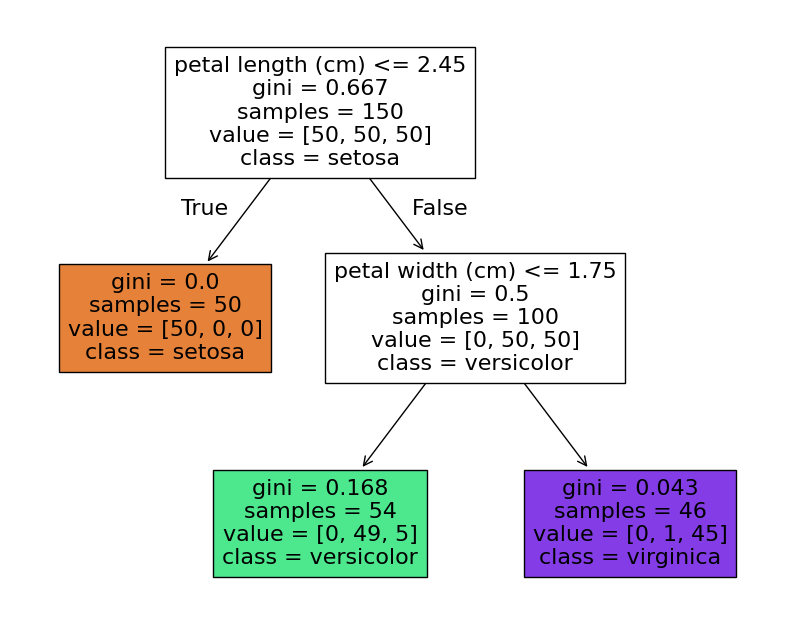

In [ ]:
# Visualize tree
fig = plt.figure(figsize=(10,8))
annotations = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)                           # filled = True uses color coding for majority of classes

In [16]:
iris2 = datasets.load_iris()
X2 = iris.data[:, :]
y2 = iris.target

In [17]:
X2[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
y2[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# Save the figure to the .png file
fig.savefig("decision_tree.png")

#### How Decision Tree Makes Prediction

In the above example, we see how the Decision tree makes predictions. In this, we need to classify a flower. At depth 0, at the top (root node), this node asks the condition whether the flower’s sepal length $\leq$ 2.45 cm. If it is, then we move down to the root’s left child node (depth 1, left). Here, it's a leaf node (means it does not have any child nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the  Decision Tree predicts that the flower is an Iris-Setosa (class=setosa).

Now, in another case, when the sepal length of a flower is $\geq$ 2.45cm. We then move down to right the child node (depth 1, right), which is not a leaf node, and ask if sepal width is $\leq$ 1.75cm. If it is, then the flower is Iris-Versicolor (depth 2, left). If not, it is surely, Iris-Virginica (depth 2, right).

On each node, the `samples` represent the number of training instances. For example, 54 samples have sepal length $\geq$ 2.45cm and sepal width $\leq$ 1.75cm (depth 2, left). The node's `values` show how many training instances of each class this node applies. For example, at depth 2, right, applies 0 to Iris-Setosa, 1 to Iris-Versicolor, and 45 to Iris-Virginica.

At last, the `gini-impurity` measures the node's impurity, if a node is `pure` (gini = 0), means that all the instances belong to a single class. Example, depth 1, left node.

##### Gini Impurity and Entropy

In a decision tree, by default `gini_impurity` is used. But, we can use `entropy` by changing the `criterion` hyperparameter to "`entropy`". The gini impurity is one of the methods used in decision tree algorithms to decide the optimal split from a root node and subsequent splits.

The entropy came from thermodynamics, where if entropy approaches 0 that means the molecules are still and well-ordered. In ML, it is used to measure the impurity: a set's entropy 0 means that all the instances belong to the same class.

*Equation for calculating the Gini-impurity:*

$G_i =$ $1 - \sum_{k=1}^{n} p_{i,k}^2$

The above equation shows how the training algorithm computes the gini-score $G_i$ of the $i^{th}$ node.

For example, the *depth-2 left node* has a gini score equal  to $1 – (0/54)^2 – (49/54)^2 – (5/54)^2 ≈ 0.168$.

*Equation for calculating the Entropy:*

$H_i =$ $- \sum_{i=1}^{n} p_{i,k} \log_2 (p_{i,k})$, $\hspace{0.5cm}where, p_{i,k} \neq 0$

The above equation shows the definition  of  the  entropy  of  the  $i^{th}$  node.

For  example, given above, the *depth-2 left node* has an entropy equal to $- \frac{49}{54} \log_2 (\frac{49}{54}) - \frac{5}{54} \log_2 (\frac{5}{54}) \approx 0.445$

Where, $k$ is class of the problem. In this example, there are three classes, Iris-versicolor, Iris-Setosa, and Iris-Virginica.

#### Estimating Class Probabilities

The instance probability denoted by $p_{i,k}$ denotes the probability of an instance belongs to a class $k$.

For example, we have a flower whose sepal length is 5cm and sepal width is 1.5cm (depth 2, left node). The following probabilities: 0% for Iris-Setosa $(\frac{0}{54})$, 90.74% for Iris-Versicolor $(\frac{49}{54})$, and 9.25% for Iris-Verginica $(\frac{5}{54})$. And this will predict the class as Iris-Versicolor.

In [19]:
# Predicting probability of a class
clf.predict_proba([[1, 2, 5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [20]:
# Predicting a class
clf.predict([[1, 2, 5, 1.5]])

array([1])

### The CART Training Algorithm

Scikit-Learn  uses  the  Classification  And  Regression  Tree  (CART)  algorithm  to  train Decision Trees (also called “growing” trees). CART constructs binary trees using the feature and threshold that yield the largest information gain or minimum gini-impurity at each node.

*Cart Cost Function For Classification*

$J_{k,t_k} =$ $\frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$

\begin{equation*}
Where\begin{cases}
         G_{left/right} \hspace{0.25cm} \text{measures the  impurity  of  the  left/right  subset}, \\
         m_{left/right} \hspace{0.25cm} \text{is  the  number  of  instances  in  the  left/right  subset}  \\
     \end{cases}
\end{equation*}

Equation shows that the algorithm first the splits the training subsets using a single feature $k$ and a limiting value or condition $t_k$. The algorithm works as follows:

- It creates different pairs of $(k,t_k)$. It searches for the pair that produces the purest subset (i.e.minimum gini-impurity) weighted by their size.

Once it splits the training set in  two, it splits the subsets using the same algorithm and this iteration will be done until it reaches the maximum depth (i.e., `max_depth` hyperparameter). A  few  other  hyperparameters control   additional  stopping   conditions (`min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes`).



### Regularization Hyperparameters

Decision tree does not make any prior assumptions of training data (unlike linear models, which assume the data as linear).  If left unconstrained, the tree will closely fit itself according to the training instances, and most likely lead to overfitting (means the model will perform poorly on the test dataset). So, to avoid overfitting the training data, the hyperparameters need to be restricted and passed during the modeling. This process is what is known as Regularization Hyperparameters.

In  Scikit-Learn,  this  is  controlled  by  the `max_depth`  hyperparameter  (the  `default  value`  is  `None`,  which  means  unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting. The `DecisionTreeClassifier` class has a few other parameters that similarly restrict the  shape  of  the  Decision  Tree:  `min_samples_split` (the  minimum  number  of  samples a node must have before it can be split), `min_samples_leaf` (the minimum number   of   samples   a   leaf   node   must   have),   `min_weight_fraction_leaf`   (same   as min_samples_leaf  but  expressed  as  a  fraction  of  the  total  number  of  weighted instances), `max_leaf_nodes` (maximum  number  of  leaf  nodes),  and  `max_features` (maximum number of features that are evaluated for splitting at each node). Increasing  `min_*`  hyperparameters  or  reducing  `max_*`  hyperparameters  will  regularize  the model.

In the example below, we will visualize the decision tree, one by regularizing hyperparameter and one without any restrictions.  

In [21]:
# Load iris dataset and define variables with petal length and width
iris1 = datasets.load_iris()
X1 = iris.data[:, 2:]
y1 = iris.target

In [22]:
# Load iris dataset and define variables with sepal length and width
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

# First tree without restrictions
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Second tree with hyperparameters
tree_clf2 = DecisionTreeClassifier(max_depth =2, min_samples_leaf =1, min_samples_split = 2, random_state=2)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [23]:
# Define a function for plotting decision boundary
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris = True, legend=False, plot_training=True):

    # define array for x1 and x2 axes
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)

    # make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids
    x1, x2 = np.meshgrid(x1s, x2s)

    # the numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # predict and reshape the y_pred according to x
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # module is used for mapping numbers to colors or color specification conversion in a 1-D array of colors also known as colormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if plot_training:
        # plot Setosa in yellow
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        # plot Versicolor in blue
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        # plot Virginica in green
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)

    if iris:
        # define x_axes label
        plt.xlabel("Petal length", fontsize=14)
        # define y_axes label
        plt.ylabel("Petal width", fontsize=14)

    if legend:
        plt.legend(loc="lower right", fontsize=14)

To know more about Listedcolormap and meshgrid in the above code, click [here](https://stackoverflow.com/questions/44443993/matplotlib-colors-listedcolormap-in-python).

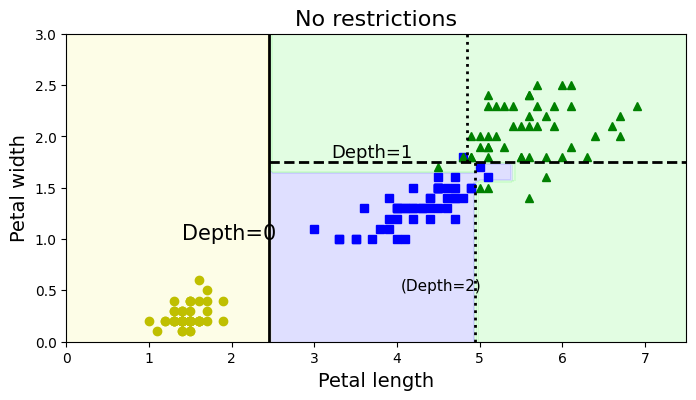

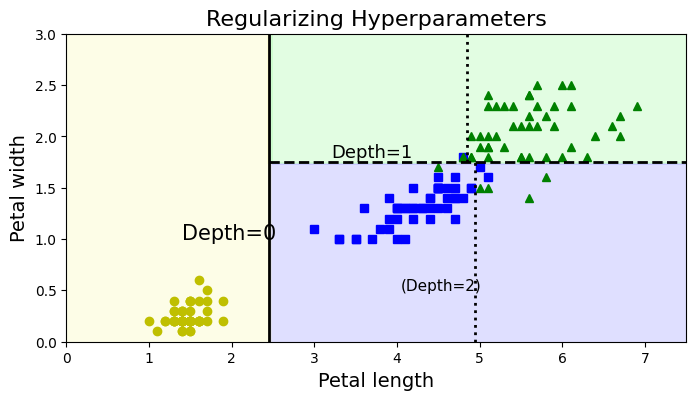

In [24]:
# Plot both the decision tree
plt.figure(figsize=(8, 4))

# call the plot_decision_boundary function for tree_clf
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.title("No restrictions", fontsize=16)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.figure(figsize=(8, 4))

# call the plot_decision_boundary function for tree_clf2
plot_decision_boundary(tree_clf2, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.title("Regularizing Hyperparameters", fontsize=16)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

From the above figure, we can see that, when there is no restriction of hyperparameters in decision tree, it can adjust itself according to the training dataset (overfitting problem). While, on the other hand, where there is the regularization of hyperparameters, the model will probably generalize better.

### Decision Tree: Regression

Decision  Trees  are  also  capable  of  performing  regression  tasks.  Below, present the `DecisionTreeRegressor` visualization methods from Scikit-Learn package. Here, in this section, we use the Boston Housing dataset to create a decision tree regressor.

In [25]:
# Prepare the data
boston = pd.read_csv("./Boston_Housing.csv")
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [26]:
X.shape

(506, 13)

In [27]:
y.shape

(506,)

In [28]:
boston.columns[:-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

To keep the size of the tree small, set max_depth = 3.

In [29]:
# Fit the regressor, set max_depth = 3
dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = dt.fit(X, y)

Visualizing Decision Tree Regression same as classifier in previous topic.

In [30]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



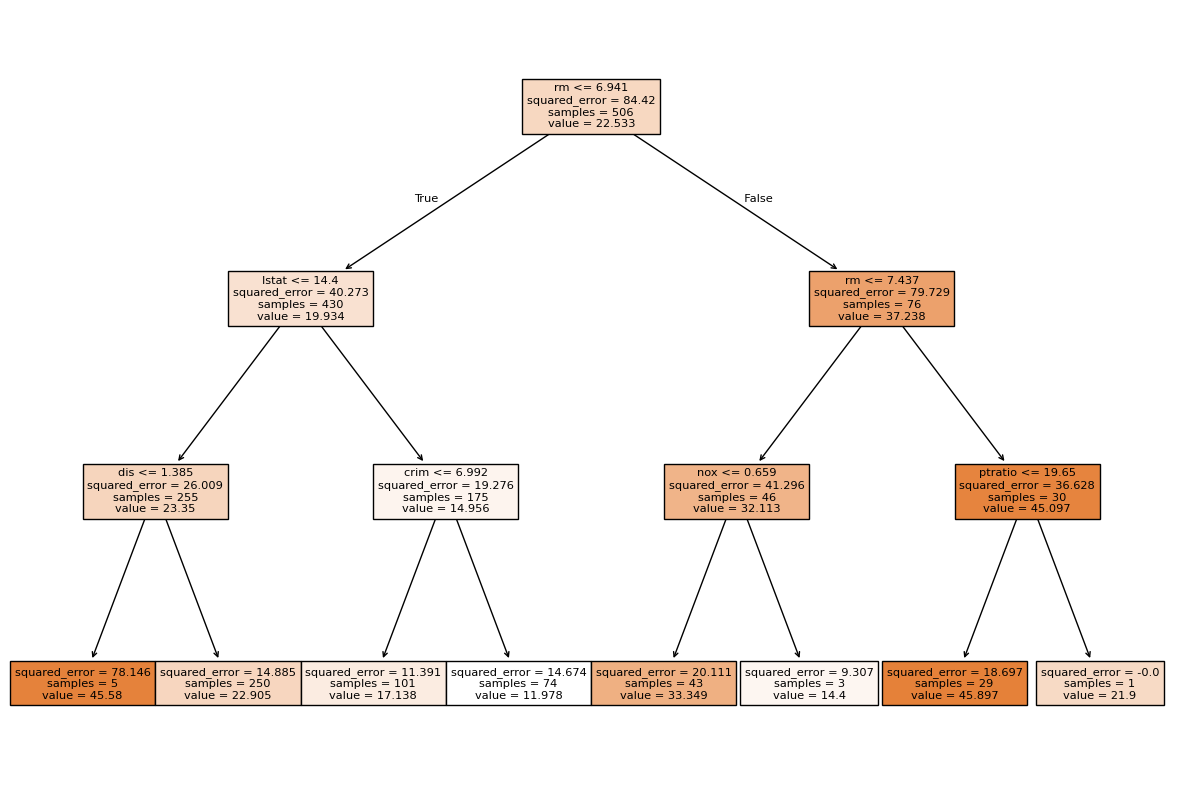

In [31]:
# Visualize tree using plot_tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt, feature_names=boston.columns[:-1], filled=True)

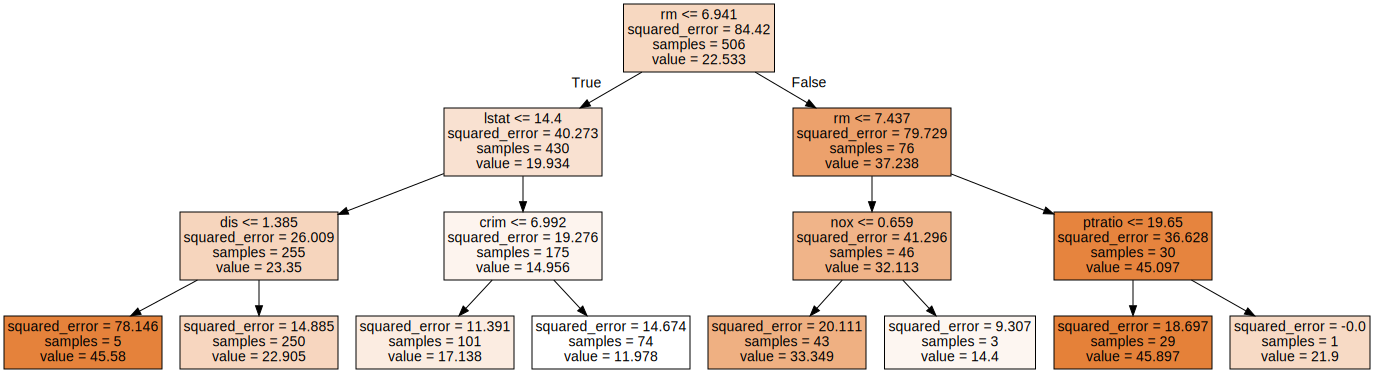

In [32]:
# Visualize tree using graphviz
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=boston.columns[:-1],
                                filled=True)
graphviz.Source(dot_data, format="png")

In [33]:
features = boston.columns[:-1]
target = boston.columns[-1]
features, target

(Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
        'ptratio', 'b', 'lstat'],
       dtype='object'),
 'medv')

In [34]:
# Visualize tree using dtreeviz
viz_model = dtreeviz.model(dt,
                           X_train=X, y_train=y,
                           feature_names=features,
                           target_name=target)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


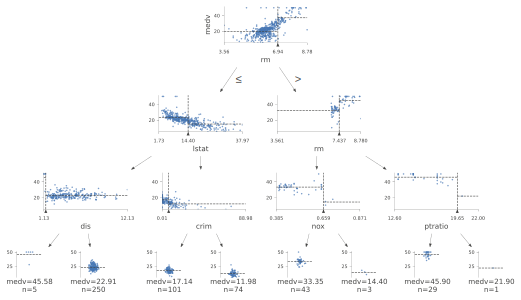

In [35]:
viz_model.view(scale=0.8)

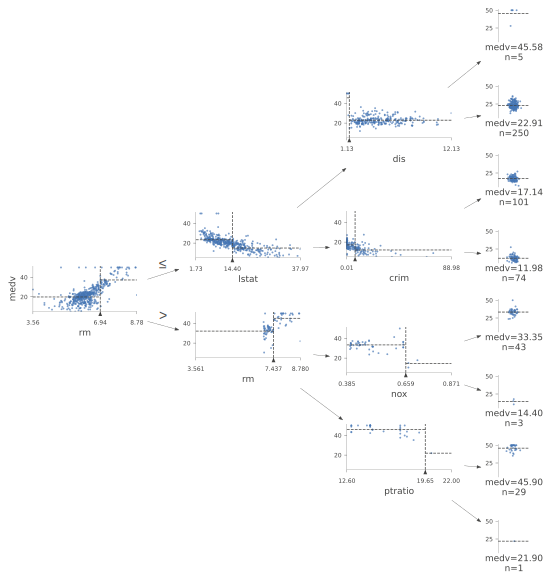

In [36]:
viz_model.view(orientation="LR")

Read more on dtreeviz visualization [here](https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb)

From the above `plot_tree` and `graphviz` diagram, we can see that the decision tree for regression is similar to that of classification. But with only one difference, here it is predicting a value instead of a class. So, suppose we want to make a prediction of a new instance which is RM = 7 and NOX = 0.6. Starting from the root node, we end up at the leaf node that predicts value = 33.35. This value is just the average of 43 training instances that fall into this leaf node. This prediction results in mean squared error (MSE) = 20.11 over 43 instances.

Thus, the target value predicted in each region is the average target value of the instances in that region.  The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training  set  in  a  way  that  minimizes  the  MSE.

*Cart Cost Function For Regression*

$J_{k,t_k} =$ $\frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$

\begin{equation*}
Where\begin{cases}
         MSE_{node} \hspace{0.25cm} \sum_{i \in node} (\hat{y} - y^{(i)})^2, \\
         \hat{y} = \frac{1}{m_{node}} \sum_{i \in node} y^{(i)}  \\
     \end{cases}
\end{equation*}

As we saw in classification problem, decision trees in regression with no regularization on hyperparameters are also prone to overfitting. From the graph obtained by running the below code, we see predictions obtained with `max_depth = 8` on left and on the right without any regularization.

In [37]:
# Define plot regression function

def plot_regression_predictions(tree_reg, X, y, axes=[0.3, 1, 0, 60], ylabel="$y$"):
    # creating the x-axes grid in array
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    # define y
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)

    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)

    plt.plot(X, y, "b.")
    # plot y hat (predicted values) in red line in both graphs
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

In [38]:
# Take index value 4 i.e, NOX
X = boston.iloc[:,4:5]
y = boston.iloc[:,-1]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


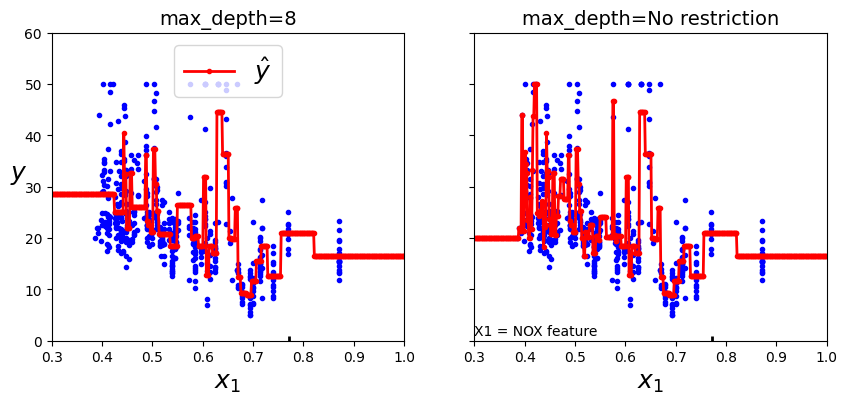

In [39]:
# Define model with no hyperparameter
dt = DecisionTreeRegressor(random_state=1234)
dt.fit(X, y)

# Define model with maximum depth = 8
dt2 = DecisionTreeRegressor(max_depth=8, random_state=1234)
dt2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])

# Plot decision boundary
plot_regression_predictions(dt2, X, y)

for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    # Plot the fit regression line
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=8", fontsize=14)

plt.sca(axes[1])
# Plot dcision boundary
plot_regression_predictions(dt, X, y, ylabel=None)

for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    # Plot the fit regression line
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.title("max_depth=No restriction", fontsize=14)
plt.text(0.3,1, "X1 = NOX feature", fontsize=10)
plt.show()

The one without any hyperparameters setting is obviously overfitting the training instances and just by restricting max_depth = 8 results in a much more reasonable model.

In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:,2:] #Make 2 features in the data
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file='dt_example.dot', max_depth=2,
feature_names=iris.feature_names[2:], class_names=iris.target_names,
rounded=True)


In [42]:
!dot -Tpng dt_example.dot -o dt_example.png
from google.colab import files
files.download('dt_example.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Limitations of Decision Tree Algorithm

The major limitations of decision tree approaches for data analysis are:

- Provide less information on the relationship between the predictors and the target variable (unlike, in linear models, we get a mathematical relation between x and y as y = $\theta$ x + c).
- Biased toward predictors with more variance.
- Can have issues with highly collinear predictors.
- Can have poor prediction accuracy for responses with low sample sizes.
- Trees can be unstable because small variations in the data might result in a completely different tree being generated.
- For classification, if some classes dominate, it can create biased trees. It is therefore recommended to balance the dataset prior to fitting.

### Theory Questions

1. What  is  the  approximate  depth  of  a  Decision  Tree  trained  (without  restrictions)
on a training set with 1 million instances?

 The depth of a well-balanced binary tree containing $m$ leaves is equal to $\log_2(m)$, rounded up. A binary Decision Tree (one that makes only binary decisions, as is the case of all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of $\log_2(10^6) ≈ 20$ (actually a bit more since the tree will generally not be perfectly well balanced).

2. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

 If a Decision Tree is overfitting the training set, it may be a good idea to decrease max_depth, since this will constrain the model, regularizing it.

3. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

 Decision Trees don’t care whether or not the training data is scaled or centered; that’s one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.



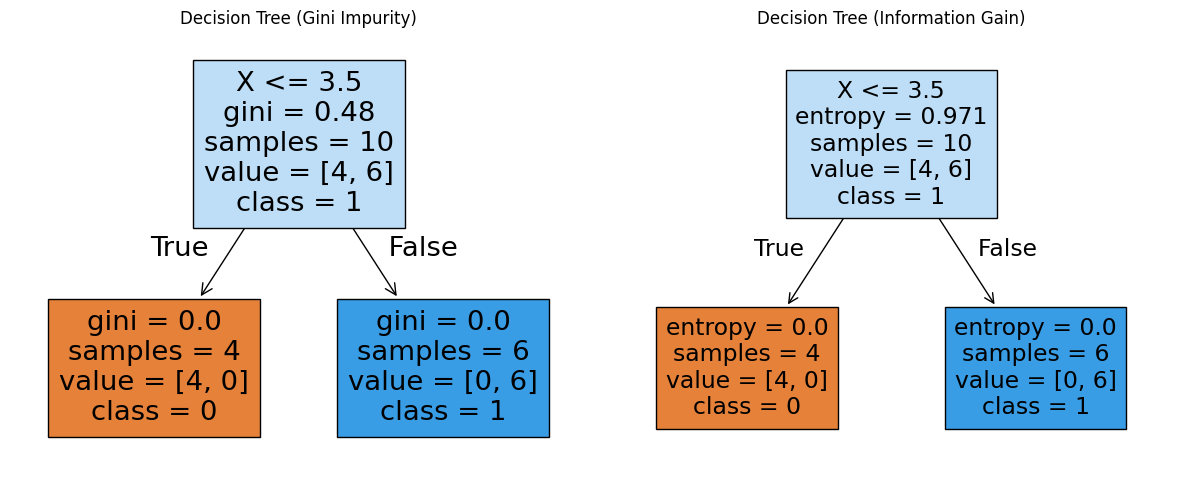

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Example dataset
X = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

# Decision Tree using Gini Impurity
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_gini.fit(X, y)

# Decision Tree using Information Gain (Entropy)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_entropy.fit(X, y)

# Plotting the Decision Trees
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_tree(clf_gini, filled=True, feature_names=['X'], class_names=['0', '1'])
plt.title('Decision Tree (Gini Impurity)')

plt.subplot(1, 2, 2)
plot_tree(clf_entropy, filled=True, feature_names=['X'], class_names=['0', '1'])
plt.title('Decision Tree (Information Gain)')

plt.tight_layout()
plt.show()


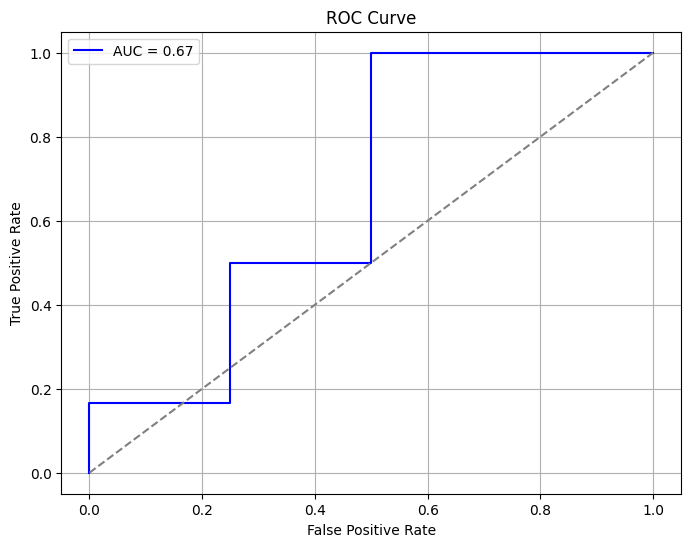

Threshold: inf, TPR: 0.00, FPR: 0.00
Threshold: 0.90, TPR: 0.17, FPR: 0.00
Threshold: 0.80, TPR: 0.17, FPR: 0.25
Threshold: 0.65, TPR: 0.50, FPR: 0.25
Threshold: 0.50, TPR: 0.50, FPR: 0.50
Threshold: 0.30, TPR: 1.00, FPR: 0.50
Threshold: 0.10, TPR: 1.00, FPR: 1.00


In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Sample data
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]  # Actual labels
y_scores = [0.1, 0.4, 0.35, 0.8, 0.7, 0.2, 0.9, 0.5, 0.3, 0.65]  # Predicted probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Display thresholds
for i, threshold in enumerate(thresholds):
    print(f'Threshold: {threshold:.2f}, TPR: {tpr[i]:.2f}, FPR: {fpr[i]:.2f}')


### Please answer the questions below to complete the experiment:




In [45]:
#@title A node’s Gini impurity is: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "always lower than its parent's" #@param ["", "generally lower than its parent’s", "generally greater than its parent's", "always lower than its parent's", "always greater than its parent's"]

In [46]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [48]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = ".." #@param {type:"string"}


In [47]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [49]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [50]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [51]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1965
Date of submission:  12 Jan 2025
Time of submission:  22:18:21
View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions
